In [7]:
#1. Implement KNN algorithm without using sci-kit learn library in Python.

import pandas as pd
import numpy as np
import operator

#the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive.

# loading data file into the program. give the location of your csv file
dataset = pd.read_csv("iris.data")
print(dataset.head()) # prints first five tuples of your data.

# making function for calculating euclidean distance
def E_Distance(x1, x2, length):
    distance = 0
    for x in range(length):
        distance += np.square(x1[x] - x2[x])
    return np.sqrt(distance)

# making function for defining K-NN model

def knn(trainingSet, testInstance, k):
    distances = {}
    length = testInstance.shape[1]  #The shape attribute for numpy arrays returns the dimensions of the array. 
   
    
    for x in range(len(trainingSet)):
        dist = E_Distance(testInstance, trainingSet.iloc[x], length)
        #print(dist)
        distances[x] = dist[0]
        
     #Sort the data in data file from smallest to largest (in ascending order) by the distances.    
    sortdist = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(sortdist[x][0])
    Count = {}  # to get most frequent class of rows
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in Count:
            Count[response] += 1
        else:
            Count[response] = 1
    sortcount = sorted(Count.items(), key=operator.itemgetter(1), reverse=True)
    return (sortcount[0][0], neighbors)

# making test data set
testSet = [[6.8, 3.4, 4.8, 2.4]]
test = pd.DataFrame(testSet)



# assigning different values to k
k = 1
k1 = 5
k2 = 11

# supplying test data to the model

result, neigh = knn(dataset, test, k)
result1, neigh1 = knn(dataset, test, k1)
result2, neigh2 = knn(dataset, test, k2)

# printing output prediction

print(result)
print(neigh)
print(result1)
print(neigh1)
print(result2)
print(neigh2)

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
Iris-virginica
[140]
Iris-virginica
[140, 144, 109, 114, 138]
Iris-virginica
[140, 144, 109, 114, 138, 146, 76, 147, 139, 111, 143]


[0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333]


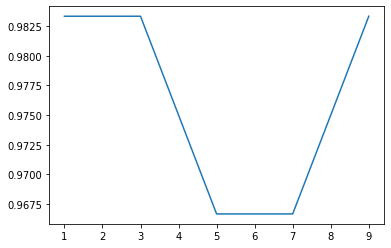

In [5]:
#2. Split the Iris dataset into 60% train and 40% test.
#Evaluate (find accuracy) KNN algorithm on different values of K. 
#Use sci-kit learn library to execute KNN algorithm.
#Take K = 1, 3, 5, 7, 9. Using matplotlib library, draw accuracy (X-axis) vs K (Y-axis) plot.
#What is knee point ?

import matplotlib.pyplot as plt
import pandas as pd
#read in the data using pandas
df = pd.read_csv('iris.data')

#create a dataframe with all training data except the target column
X = df.drop(columns=['Iris-setosa'])

#separate target values
y = df['Iris-setosa'].values

from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)
from sklearn.neighbors import KNeighborsClassifier
k=1
klist=[]
accuracy=[]
while k<=9:
    klist.append(k)
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors = k)
    # Fit the classifier to the data
    knn.fit(X_train,y_train)
    #show first 5 model predictions on the test data
    knn.predict(X_test)
    #check accuracy of our model on the test data
    accuracy.append(knn.score(X_test, y_test))
    k=k+2
    
print(accuracy)
plt.plot(klist,accuracy)